In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.metrics.pairwise import cosine_similarity
from keras.preprocessing import image
from keras.applications import resnet50,vgg16,vgg19,xception,mobilenet
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
import os

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path='drive/My Drive/style/'

In [5]:
image_paths=[path+i for i in os.listdir(path) if "png" in i]
print(len(image_paths))

2184


In [6]:
def get_similarity_matrix(model):
    image_encodings=[]
    for i in range(len(image_paths)):
        H,W=model.input.shape[1:3]
        img=image.load_img(image_paths[i],target_size=(H,W))
        img=image.img_to_array(img)
        # a batch of image is expected
        img=np.expand_dims(img,axis=0)
        img=preprocess_input(img)
        encoding=model.predict(img)
        image_encodings.append(encoding.reshape(-1,))
        print(i)
    image_encodings=np.array(image_encodings)
    cos_Similarities = cosine_similarity(image_encodings)
    df = pd.DataFrame(cos_Similarities, columns=image_paths, index=image_paths)
    return df

In [7]:
model1=vgg16.VGG16(weights='imagenet')
model2=resnet50.ResNet50(weights='imagenet')
model3=vgg19.VGG19(weights='imagenet')
model4=xception.Xception(weights='imagenet')
model5=mobilenet.MobileNet(weights='imagenet')

17227776/17225924 [==============================] - 0s 0us/step


In [8]:
model_instances=[model1,model2,model3,model4,model5]
for i,m in enumerate(model_instances):
    model_instances[i]=Model(inputs=m.input,outputs=m.layers[-2].output)

In [9]:
model_names=['VGG16','ResNet50','VGG19','Xception','MobileNet']
save_path='drive/My Drive/style/similarity_matrix_'

In [1]:
from time import time
for i,m in enumerate(model_instances):
    print("encoding ",str(i)," : ",end="")
    df=get_similarity_matrix(m)
    df.to_csv(save_path+str(i))

In [17]:
def Get_similar_products(given_img):
    for i,m in enumerate(model_instances):
        print('-'*20)
        print(model_names[i])
        print("original product:")
        imgs_model_height,imgs_model_width=m.input.shape[1:3]
        original = image.load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("5 most similar products:")
        df=pd.read_csv(save_path+str(i),index_col=0)
        df.head()
        closest_imgs = df[given_img].sort_values(ascending=False)[1:5+1].index
        closest_imgs_scores = df[given_img].sort_values(ascending=False)[1:5+1]
        for i in range(0,len(closest_imgs)):
            original = image.load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
            plt.imshow(original)
            plt.show()
            print("similarity score : ",closest_imgs_scores[i])

--------------------
VGG16
original product:


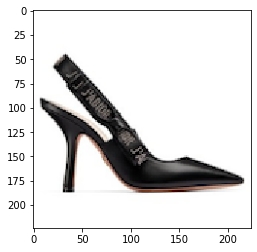

5 most similar products:


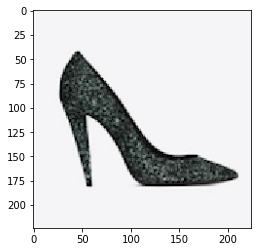

similarity score :  0.8162596


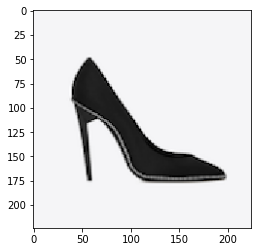

similarity score :  0.8155315


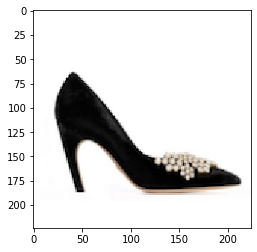

similarity score :  0.80693036


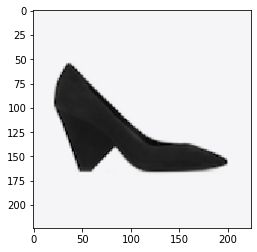

similarity score :  0.7980718000000001


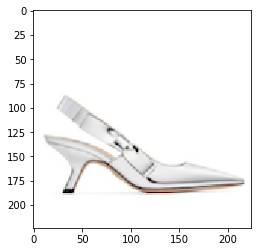

similarity score :  0.7971965999999999
--------------------
ResNet50
original product:


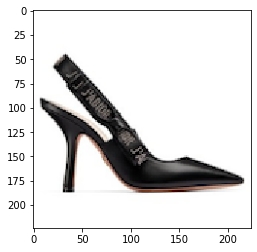

5 most similar products:


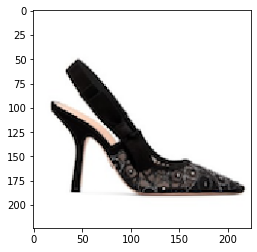

similarity score :  0.89066106


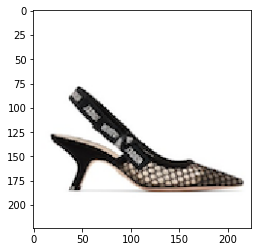

similarity score :  0.87612313


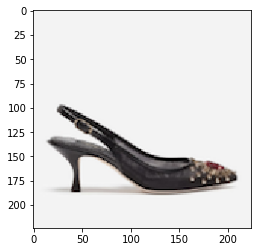

similarity score :  0.87424207


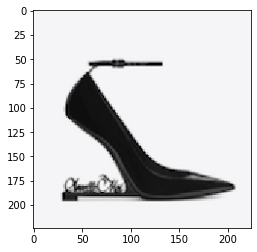

similarity score :  0.8718485


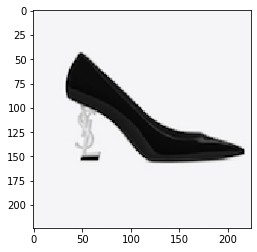

similarity score :  0.8540679
--------------------
VGG19
original product:


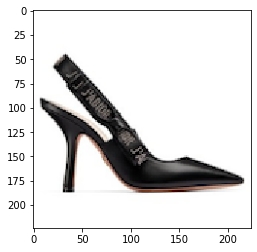

5 most similar products:


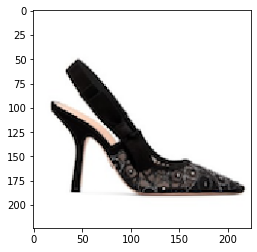

similarity score :  0.8427463


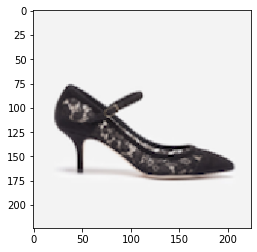

similarity score :  0.82055795


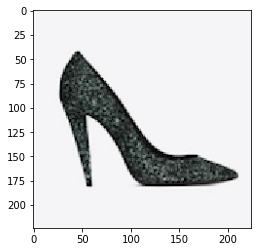

similarity score :  0.81513673


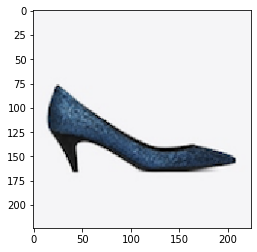

similarity score :  0.8095313000000001


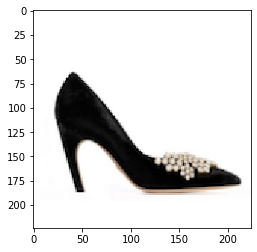

similarity score :  0.7886082
--------------------
Xception
original product:


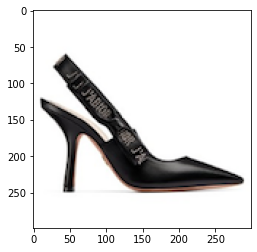

5 most similar products:


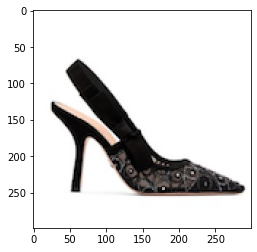

similarity score :  0.99784434


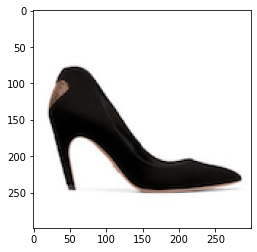

similarity score :  0.99735177


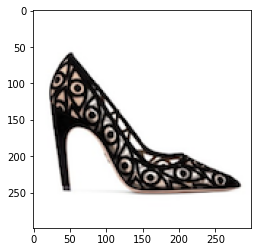

similarity score :  0.9972004000000001


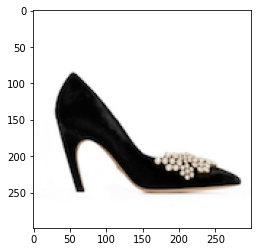

similarity score :  0.9965021000000001


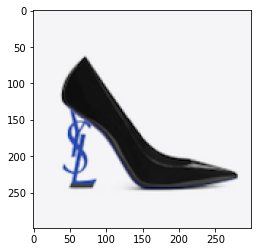

similarity score :  0.9954675
--------------------
MobileNet
original product:


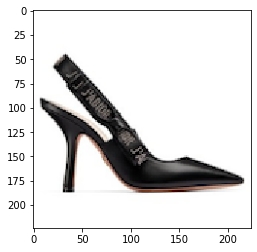

5 most similar products:


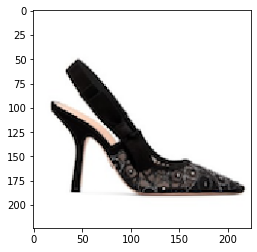

similarity score :  0.89838314


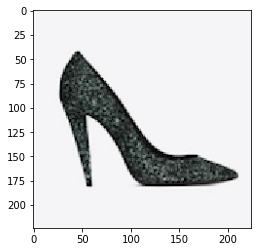

similarity score :  0.83874017


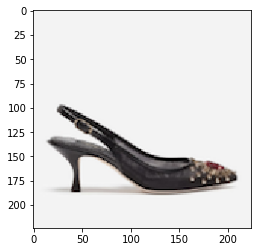

similarity score :  0.8384553


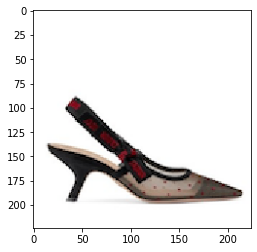

similarity score :  0.8324031


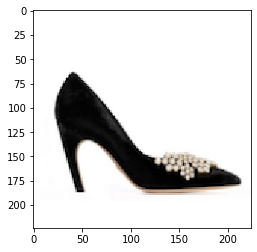

similarity score :  0.82330203


In [19]:
i=np.random.randint(0,len(image_paths))
Get_similar_products(image_paths[i])

--------------------
VGG16
original product:


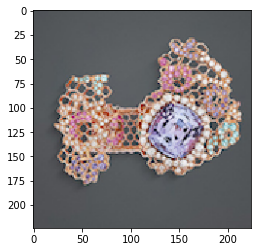

5 most similar products:


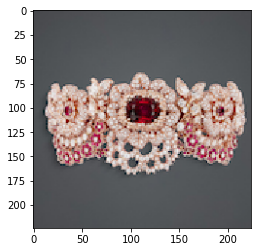

similarity score :  0.83927035


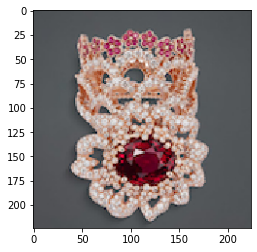

similarity score :  0.8194256999999999


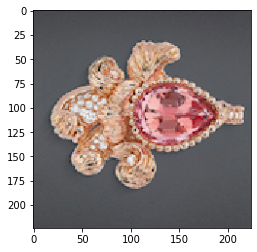

similarity score :  0.8188976


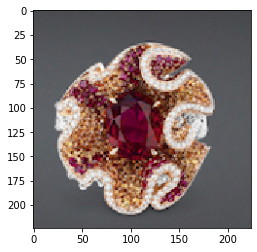

similarity score :  0.79950815


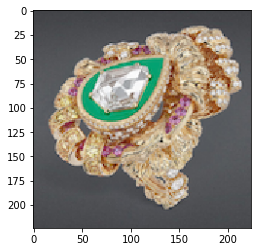

similarity score :  0.7966724000000001
--------------------
ResNet50
original product:


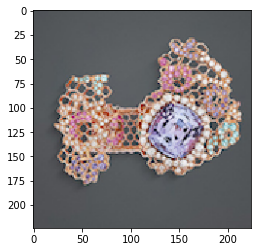

5 most similar products:


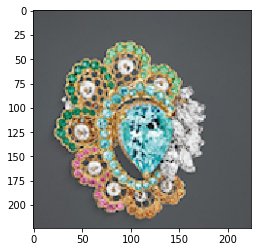

similarity score :  0.85158396


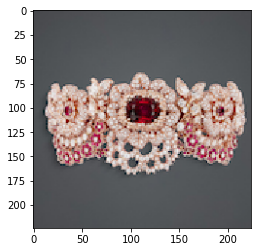

similarity score :  0.8473384


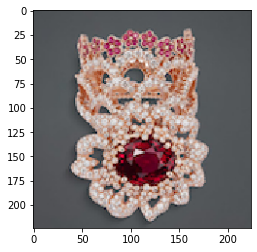

similarity score :  0.8472970999999999


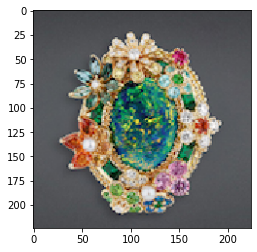

similarity score :  0.8352841000000001


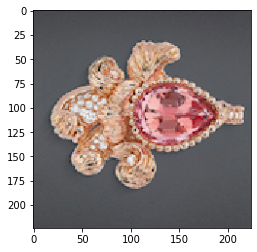

similarity score :  0.82052547
--------------------
VGG19
original product:


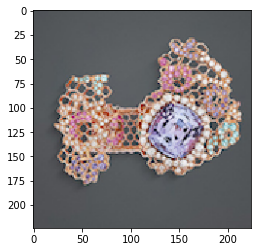

5 most similar products:


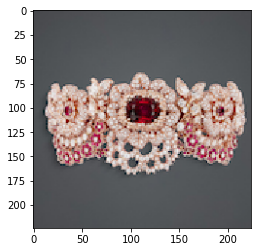

similarity score :  0.85479975


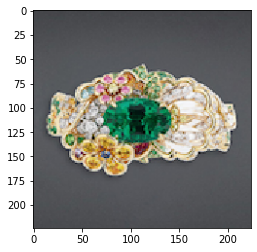

similarity score :  0.82160383


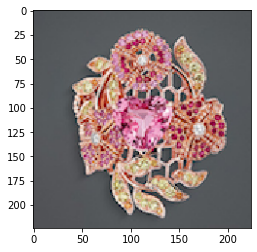

similarity score :  0.81477565


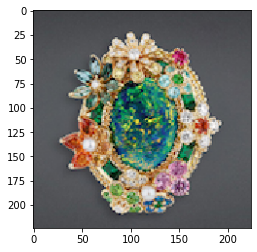

similarity score :  0.81069845


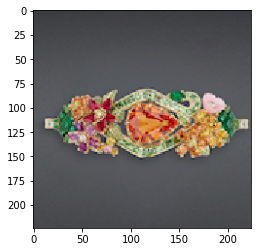

similarity score :  0.80751616
--------------------
Xception
original product:


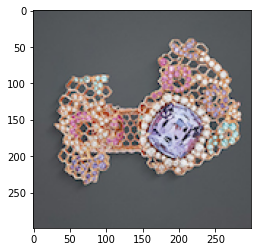

5 most similar products:


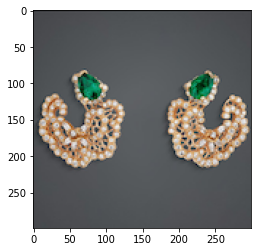

similarity score :  0.91503704


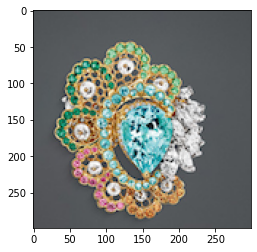

similarity score :  0.9049404000000001


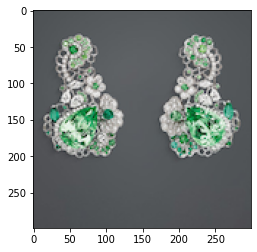

similarity score :  0.89470685


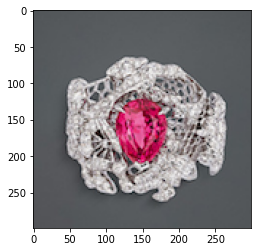

similarity score :  0.88308716


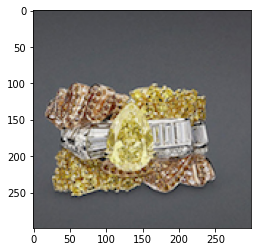

similarity score :  0.8825569999999999
--------------------
MobileNet
original product:


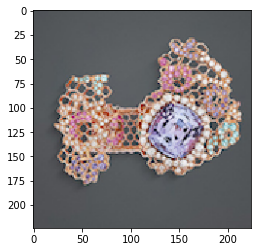

5 most similar products:


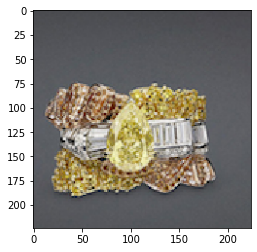

similarity score :  0.83427584


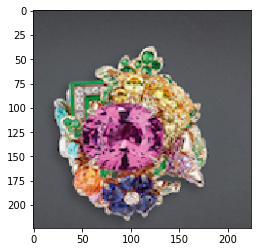

similarity score :  0.82672393


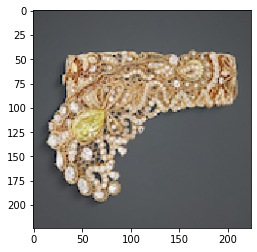

similarity score :  0.8243101999999999


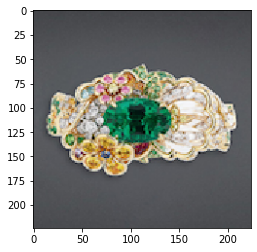

similarity score :  0.821738


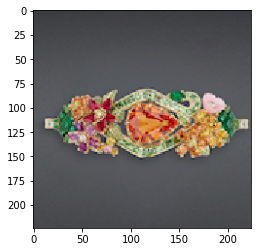

similarity score :  0.81399703


In [20]:
i=np.random.randint(0,len(image_paths))
Get_similar_products(image_paths[i])

--------------------
VGG16
original product:


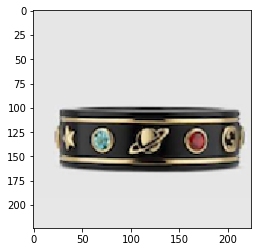

5 most similar products:


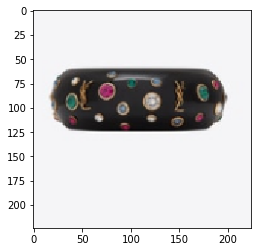

similarity score :  0.6566377


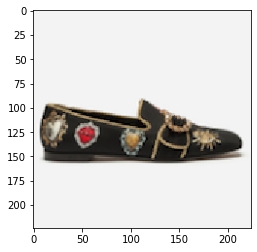

similarity score :  0.55176055


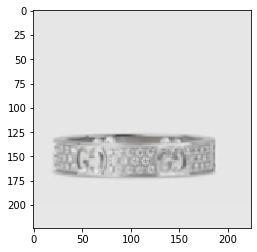

similarity score :  0.5447211


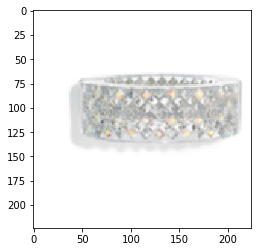

similarity score :  0.53188735


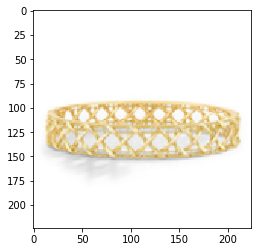

similarity score :  0.5229781
--------------------
ResNet50
original product:


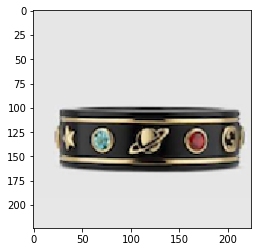

5 most similar products:


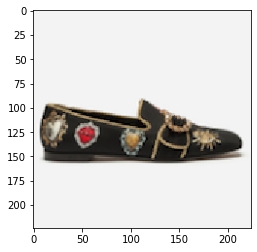

similarity score :  0.69661695


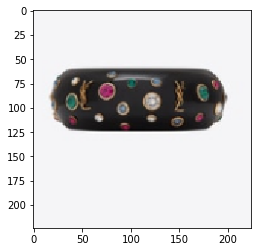

similarity score :  0.6959973


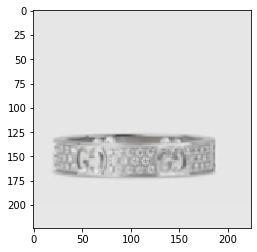

similarity score :  0.6565728


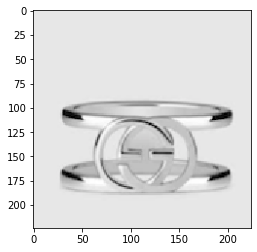

similarity score :  0.62366384


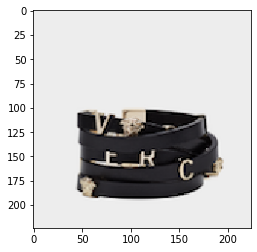

similarity score :  0.618372
--------------------
VGG19
original product:


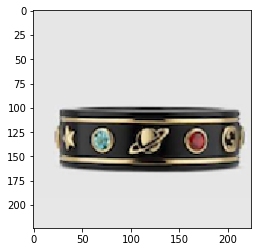

5 most similar products:


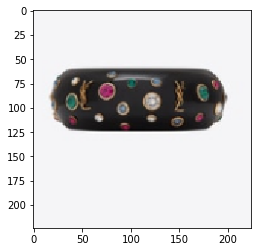

similarity score :  0.66517115


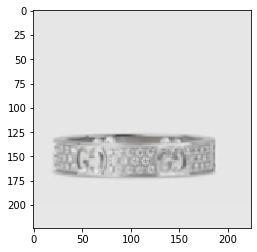

similarity score :  0.5840853


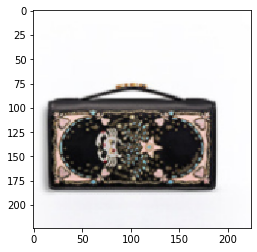

similarity score :  0.5623617


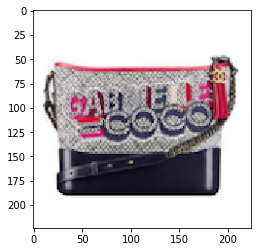

similarity score :  0.53812253


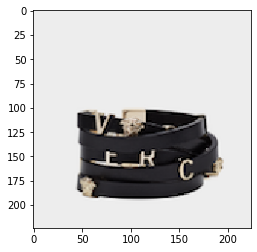

similarity score :  0.52826196
--------------------
Xception
original product:


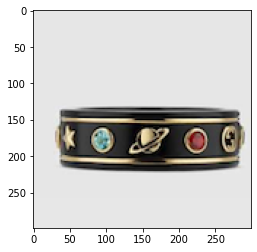

5 most similar products:


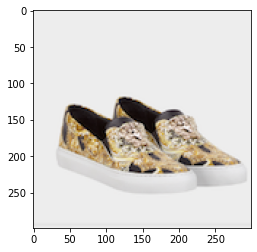

similarity score :  0.99479246


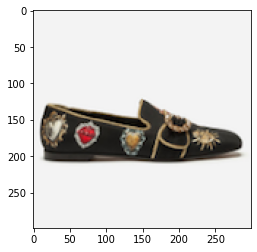

similarity score :  0.9932972


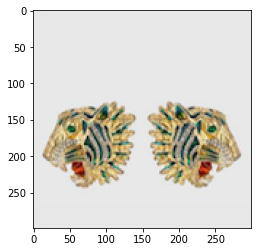

similarity score :  0.99289733


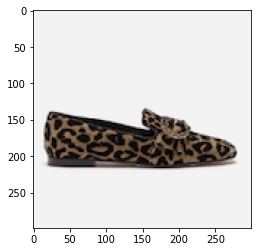

similarity score :  0.99228144


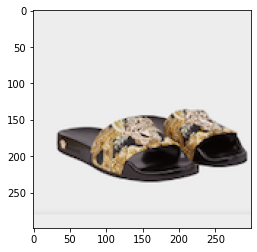

similarity score :  0.9919934000000001
--------------------
MobileNet
original product:


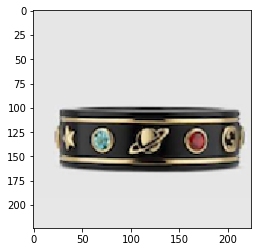

5 most similar products:


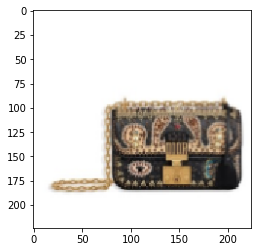

similarity score :  0.8247935


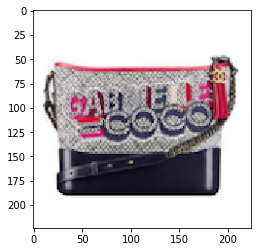

similarity score :  0.79290056


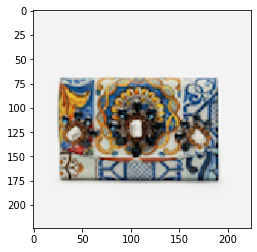

similarity score :  0.7924542


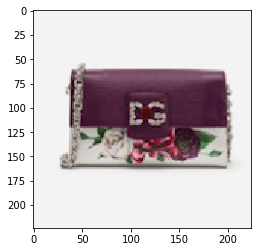

similarity score :  0.78978187


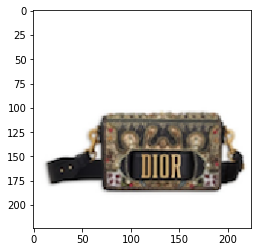

similarity score :  0.78950715


In [22]:
i=np.random.randint(0,len(image_paths))
Get_similar_products(image_paths[i])

--------------------
VGG16
original product:


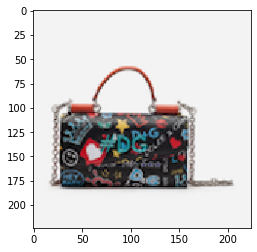

5 most similar products:


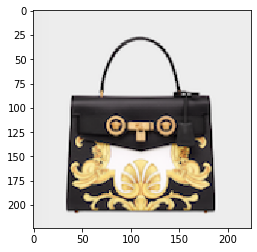

similarity score :  0.7143673


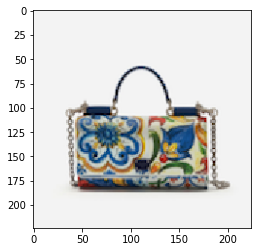

similarity score :  0.69559044


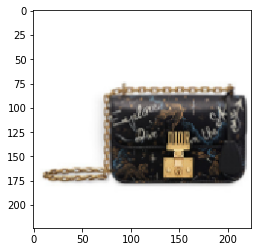

similarity score :  0.6816813


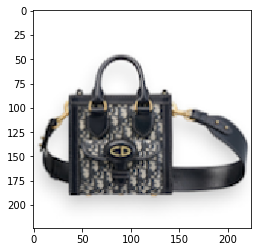

similarity score :  0.6777274999999999


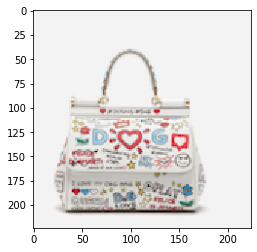

similarity score :  0.67769635
--------------------
ResNet50
original product:


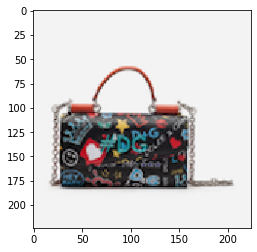

5 most similar products:


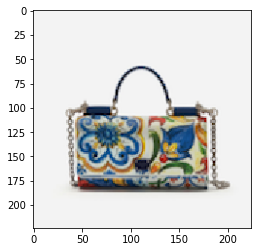

similarity score :  0.80171883


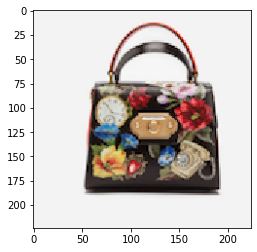

similarity score :  0.78059745


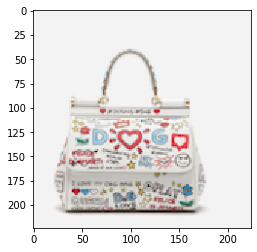

similarity score :  0.7752639


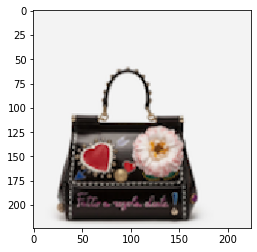

similarity score :  0.77265626


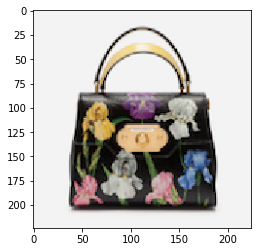

similarity score :  0.75971746
--------------------
VGG19
original product:


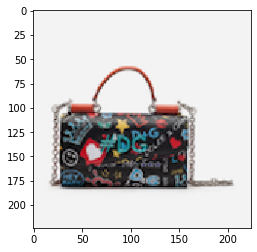

5 most similar products:


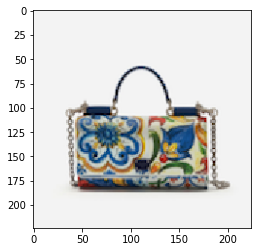

similarity score :  0.8306684999999999


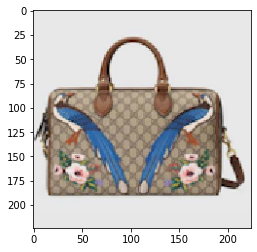

similarity score :  0.7662063


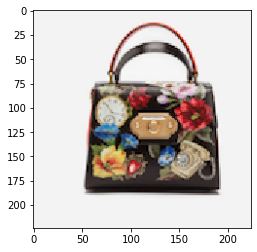

similarity score :  0.72816193


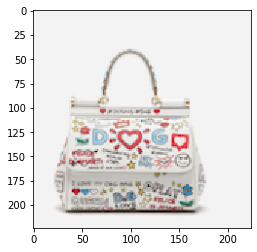

similarity score :  0.72239816


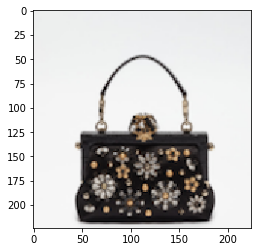

similarity score :  0.71784306
--------------------
Xception
original product:


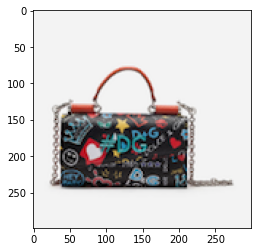

5 most similar products:


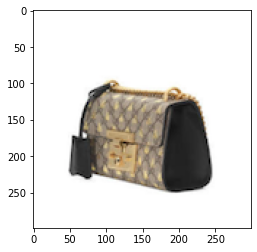

similarity score :  0.9930313000000001


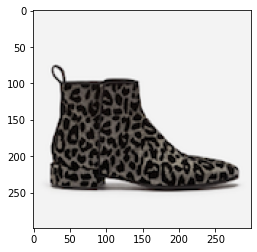

similarity score :  0.9930074000000001


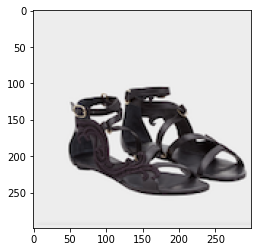

similarity score :  0.9926242000000001


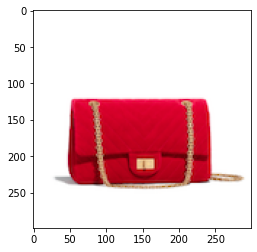

similarity score :  0.99234515


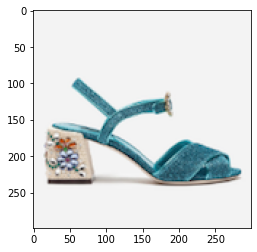

similarity score :  0.9913296999999999
--------------------
MobileNet
original product:


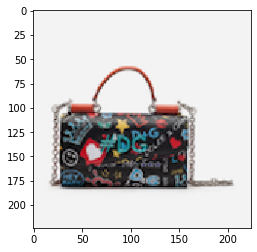

5 most similar products:


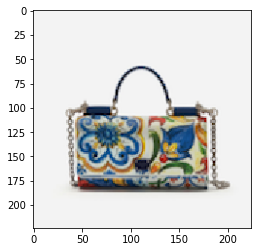

similarity score :  0.8816495999999999


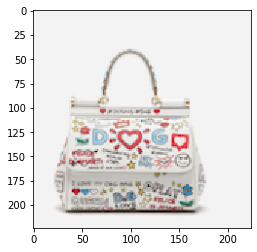

similarity score :  0.8400558000000001


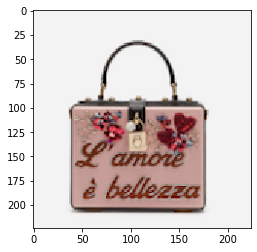

similarity score :  0.83383816


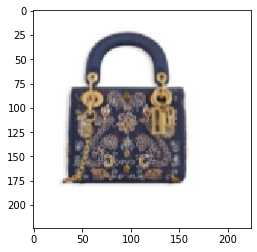

similarity score :  0.83177257


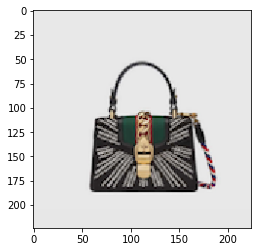

similarity score :  0.8316492


In [23]:
i=np.random.randint(0,len(image_paths))
Get_similar_products(image_paths[i])